In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer
from sklearn import preprocessing ,cross_validation,neighbors

C:\Users\50003593\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
data=pd.read_csv("nba_2013.csv")

In [32]:
#data.isnull().any()

In [33]:
data.fillna(data.mean(),inplace= True)

In [34]:
#data.isnull().any()

In [35]:
#data.head(5)

In [36]:
data=data.drop(['player','pos','bref_team_id','season_end','season'],axis=1)
#data.describe()

In [37]:
data.head(5)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [38]:
data.columns.values

array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'], dtype=object)

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
X = data[['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast','stl','blk','tov','pf']]
Y = data['pts']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [58]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value,weights='uniform', algorithm='auto')
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    print (y_pred)
    #print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

In [42]:
#data

In [43]:
print(np.percentile(data.age,[0,5,25,50,75,90,95,99,100]))

[19. 21. 23. 26. 29. 33. 35. 37. 39.]


In [44]:
data.columns.values

array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'], dtype=object)

cols_to_norm = data.columns.tolist()
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [45]:
data.head(5)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.285111,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.285111,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [46]:
from sklearn.model_selection import train_test_split

X = data[['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.','orb','drb','trb','ast','stl','blk','tov','pf']]
Y = np.asarray(data['pts'], dtype="|S6")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [59]:
for K in range(5): # apply loop for n number of data
    K_val =K+1
      
    clf = neighbors.KNeighborsClassifier(n_jobs=1,n_neighbors= K_val)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print (y_pred)

[2.000e+01 1.400e+01 1.560e+03 1.070e+02 2.000e+02 1.241e+03 1.070e+02
 5.440e+02 1.735e+03 6.500e+01 1.100e+02 1.830e+02 8.210e+02 4.700e+02
 3.800e+01 4.300e+02 6.500e+01 4.950e+02 2.250e+02 1.500e+01 0.000e+00
 1.150e+02 9.390e+02 1.810e+02 2.650e+02 3.020e+02 8.900e+01 8.900e+02
 1.081e+03 6.000e+00 6.000e+00 5.790e+02 3.600e+01 3.390e+02 1.068e+03
 2.000e+01 1.810e+02 4.030e+02 7.500e+01 1.370e+02 3.290e+02 1.594e+03
 1.500e+01 1.320e+02 9.800e+01 5.270e+02 2.000e+00 8.300e+01 6.600e+02
 1.780e+02 6.800e+01 3.500e+02 2.112e+03 1.590e+02 8.460e+02 2.000e+00
 1.465e+03 2.600e+01 5.250e+02 1.257e+03 9.290e+02 1.241e+03 4.900e+02
 3.900e+01 1.735e+03 7.810e+02 2.060e+02 4.570e+02 5.000e+00 9.000e+00
 4.830e+02 1.011e+03 9.670e+02 4.040e+02 2.900e+01 1.400e+01 6.080e+02
 1.478e+03 1.291e+03 8.100e+02 1.080e+03 8.100e+02 2.480e+02 1.113e+03
 2.000e+00 1.320e+02 1.257e+03 5.400e+01 3.800e+01 6.300e+02 1.851e+03
 1.465e+03 3.800e+01 4.950e+02 2.000e+00 2.800e+02 8.900e+02 9.110e+02
 6.180

# New code

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
X_train.dtypes

age       int64
g         int64
gs        int64
mp        int64
fg        int64
fga       int64
fg.     float64
x3p       int64
x3pa      int64
x3p.    float64
x2p       int64
x2pa      int64
x2p.    float64
efg.    float64
ft        int64
fta       int64
ft.     float64
orb       int64
drb       int64
trb       int64
ast       int64
stl       int64
blk       int64
tov       int64
pf        int64
dtype: object

In [50]:
m1 = KNeighborsRegressor(n_neighbors=3)

In [51]:
y_test = y_test.astype(np.float)
y_train = y_train.astype(np.float)

In [52]:
m1.fit(X_train,y_train)
mean_absolute_error(y_test,m1.predict(X_test))

49.98160919540231

In [53]:
import matplotlib.pyplot as plt

In [60]:
MAE = []
for K in range(5):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors= K_value)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    MAE.append(mean_absolute_error(y_test,y_pred))
    print ("Accuracy is ", mean_absolute_error(y_test,y_pred),"% for K-Value:",K_value)
K = list(range(1,6))


Accuracy is  58.48965517241379 % for K-Value: 1
Accuracy is  52.241379310344826 % for K-Value: 2
Accuracy is  49.98160919540231 % for K-Value: 3
Accuracy is  49.70862068965517 % for K-Value: 4
Accuracy is  46.58482758620689 % for K-Value: 5


In [61]:
print(len(MAE))
len(K)

5


5

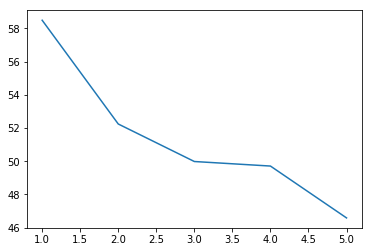

In [56]:
plt.plot(K,MAE)
plt.show()